In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

C:\Users\KRISHNA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\KRISHNA\Desktop\ENCRYPTIX INTERNSHIP\creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(283726, 31)

In [7]:
fraud = df [df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierfraction = len(fraud)/float(len(valid ))
print(outlierfraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


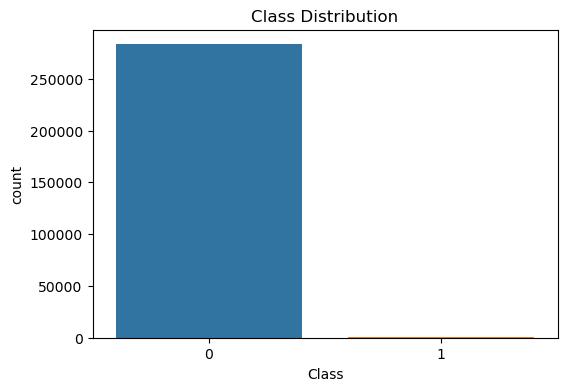

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


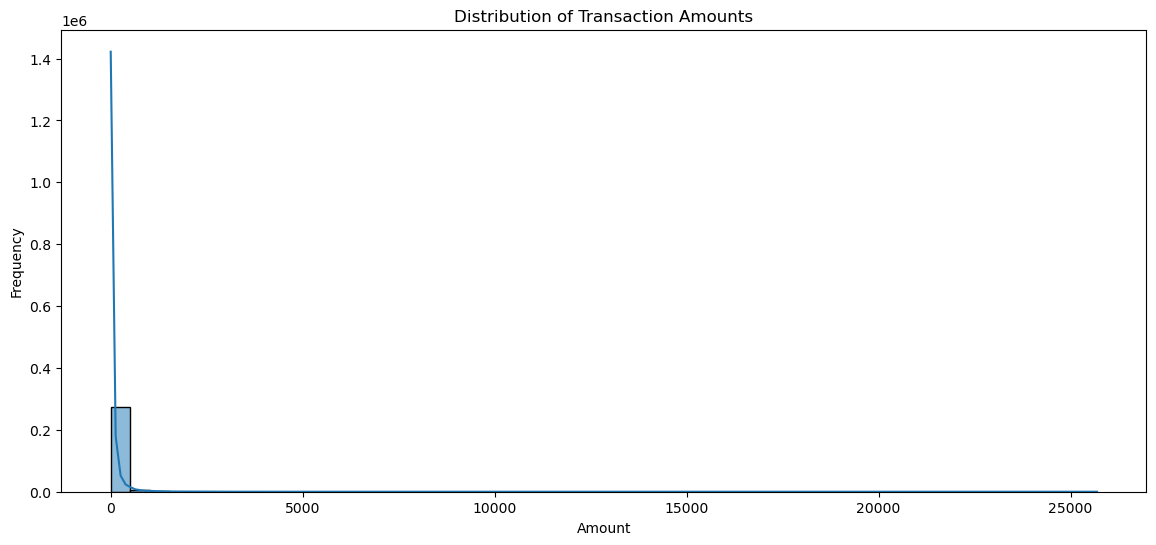

In [9]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

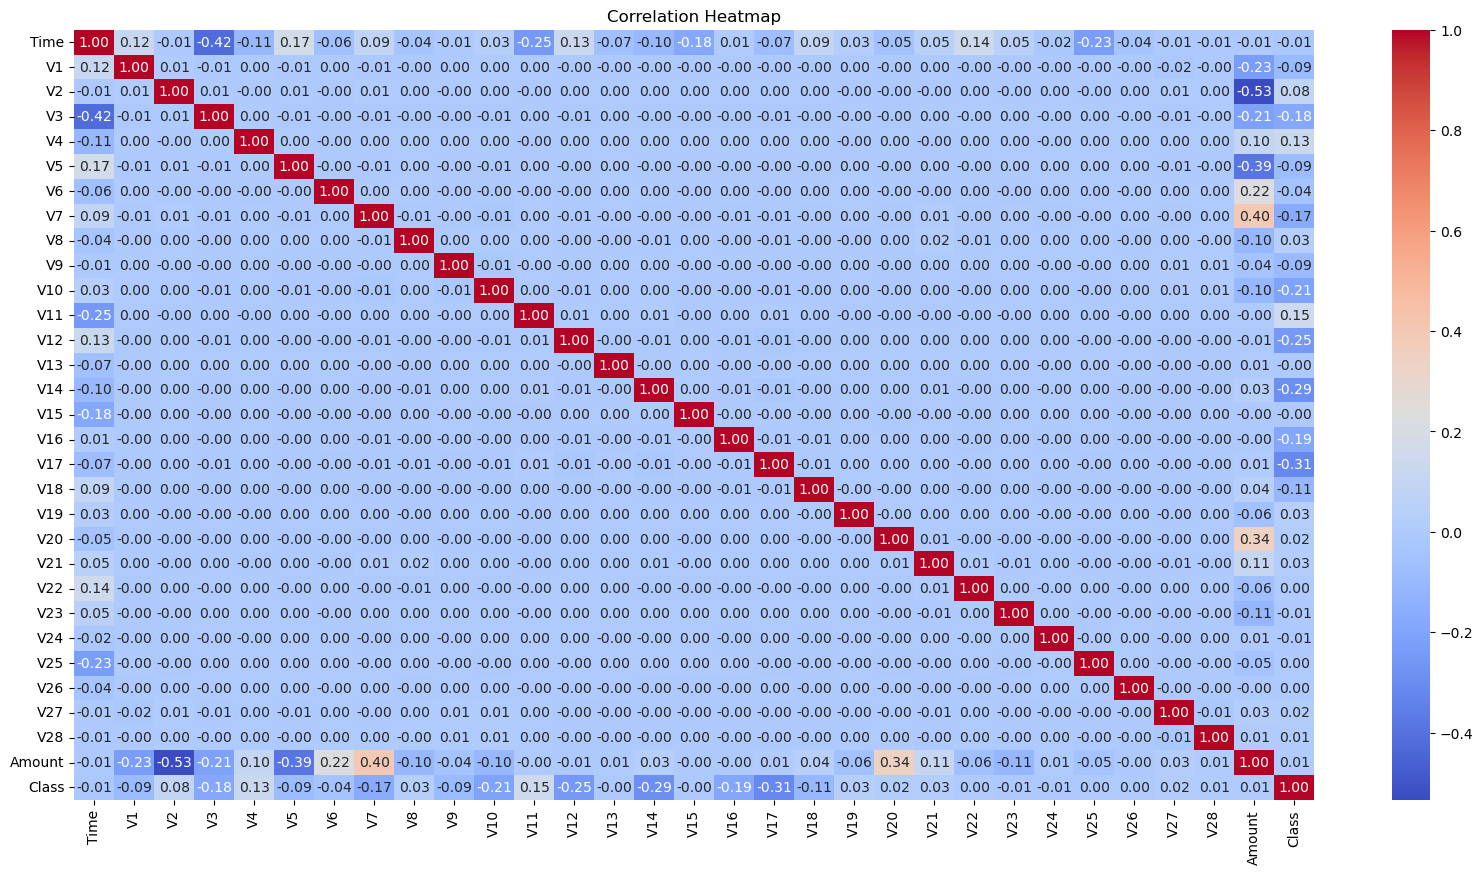

In [10]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = df.drop(columns=['Class'])
y = df['Class']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_scaled, y)

# Use feature importance for feature selection
sfm = SelectFromModel(selector, threshold='median')
sfm.fit(X_scaled, y)
X_selected = sfm.transform(X_scaled)

# Get selected feature names
selected_features = X.columns[sfm.get_support()]

print(f'Original number of features: {X.shape[1]}')
print(f'Selected number of features: {X_selected.shape[1]}')
print('Selected features:', selected_features)

Original number of features: 30
Selected number of features: 15
Selected features: Index(['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V20', 'V21', 'V26'],
      dtype='object')


In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)

In [16]:
y_pred = model.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9994360736628778
The precision is 0.9846153846153847
The recall is 0.6736842105263158
The F1-Score is 0.8


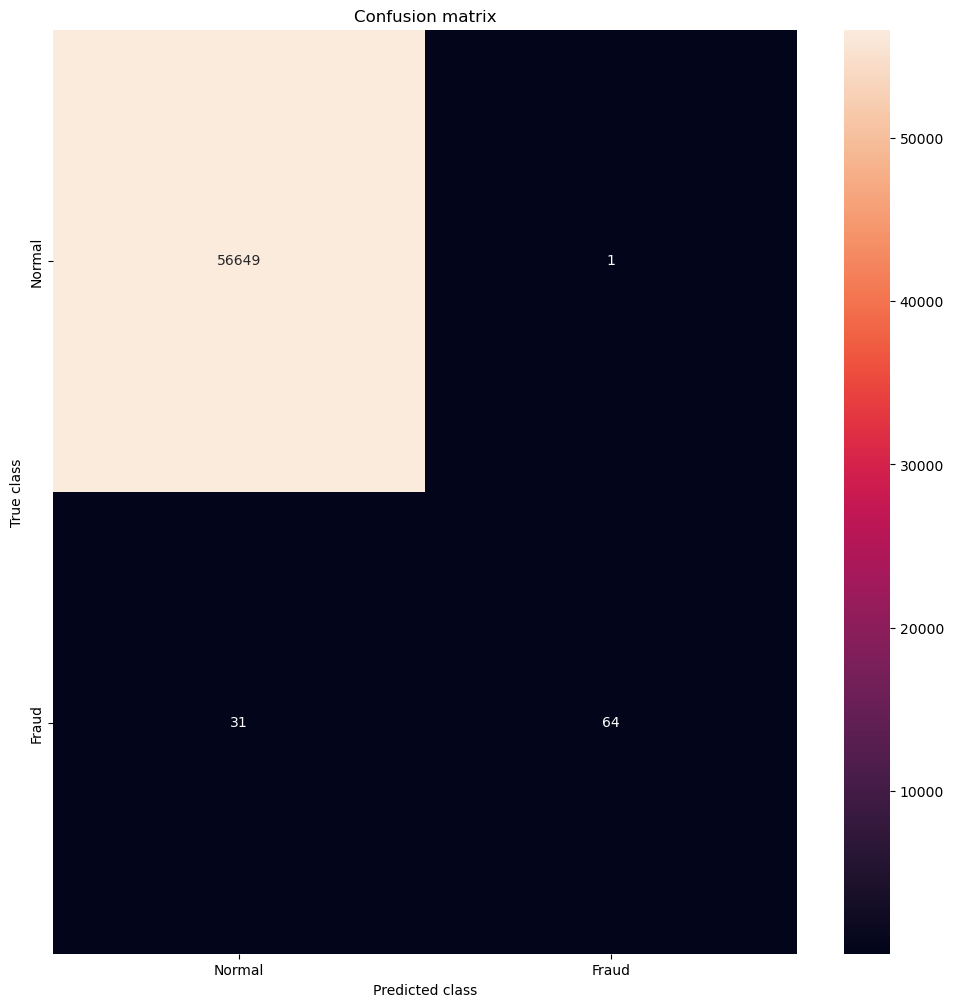

In [18]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred )
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()